In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#To remove warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
data=pd.read_excel("sample_service.xlsx")

In [3]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
inc=data.copy()

In [4]:
#To head the first 5 rows
inc.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,Category Id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,...,Subcategory 170,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,...,Subcategory 170,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
2,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,...,Subcategory 170,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
3,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,...,Subcategory 170,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
4,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,...,Subcategory 215,Symptom 471,Group 70,Resolver 89,True,False,2 - Medium,Do Not Notify,?,?


In [5]:
#To read the last 5 rows
inc.tail()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,Category Id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
344,INC0000134,New,True,0,0,2,Caller 2471,Opened by 501,2016-02-29 09:44:00,Created by 62,...,Subcategory 192,Symptom 580,Group 72,Resolver 216,True,False,3 - Low,Do Not Notify,?,?
345,INC0000134,New,True,1,0,1,Caller 2471,Opened by 501,2016-02-29 09:44:00,Created by 62,...,Subcategory 192,Symptom 580,Group 73,Resolver 216,True,False,3 - Low,Do Not Notify,?,?
346,INC0000134,Active,True,1,0,2,Caller 2471,Opened by 501,2016-02-29 09:44:00,Created by 62,...,Subcategory 192,Symptom 580,Group 73,Resolver 198,True,False,3 - Low,Do Not Notify,?,?
347,INC0000134,Resolved,True,1,0,3,Caller 2471,Opened by 501,2016-02-29 09:44:00,Created by 62,...,Subcategory 192,Symptom 580,Group 73,Resolver 198,True,False,3 - Low,Do Not Notify,?,?
348,INC0000134,Closed,False,1,0,4,Caller 2471,Opened by 501,2016-02-29 09:44:00,Created by 62,...,Subcategory 192,Symptom 580,Group 73,Resolver 198,True,False,3 - Low,Do Not Notify,?,?


In [6]:
inc.describe()

,count_reassign,count_opening,count_updated
count,349.000000,349.000000,349.000000
mean,0.702006,0.008596,3.813754
std,1.094669,0.092448,3.871831
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,3.000000
75%,1.000000,0.000000,5.000000
max,6.000000,1.000000,19.000000


In [7]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  349 non-null    object        
 1   ID_status           349 non-null    object        
 2   active              349 non-null    bool          
 3   count_reassign      349 non-null    int64         
 4   count_opening       349 non-null    int64         
 5   count_updated       349 non-null    int64         
 6   ID_caller           349 non-null    object        
 7   opened_by           349 non-null    object        
 8   opened_time         349 non-null    datetime64[ns]
 9   Created_by          349 non-null    object        
 10  created_at          349 non-null    object        
 11  updated_by          349 non-null    object        
 12  updated_at          349 non-null    datetime64[ns]
 13  type_contact        349 non-null    object        

### Pre-Processing the dataset

In [8]:
#Replace ? with the nan
inc=inc.replace("?",np.nan)

In [9]:
inc.isna().sum(axis=0)

ID                      0
ID_status               0
active                  0
count_reassign          0
count_opening           0
count_updated           0
ID_caller               0
opened_by               0
opened_time             0
Created_by             62
created_at             62
updated_by              0
updated_at              0
type_contact            0
location                0
Category Id             0
user_symptom           45
Support_group           0
support_incharge      155
Doc_knowledge           0
confirmation_check      0
impact                  0
notify                  0
problem_ID            267
change_request        343
dtype: int64

In [10]:
#Removing extra string
inc["ID_caller"]= inc["ID_caller"].str.replace("Caller", " ") 
inc["opened_by"]= inc["opened_by"].str.replace("Opened by", " ") 
inc["Created_by"]= inc["Created_by"].str.replace("Created by", " ") 
inc["Category Id"]= inc["Category Id"].str.replace("Subcategory", " ") 
inc["user_symptom"]=inc["user_symptom"].str.replace("Symptom", " ") 
inc["Support_group"]=inc["Support_group"].str.replace("Group", " ") 
inc["support_incharge"]=inc["support_incharge"].str.replace("Resolver", " ") 
inc["problem_ID"]=inc["problem_ID"].str.replace("Problem ID", " ") 
inc["updated_by"]= inc["updated_by"].str.replace("Updated by", " ") 

In [11]:
#Rename the column name
inc.rename({'Category Id':'Category_id'},axis=1, inplace=True)

In [12]:
inc["target_impact"]=inc["impact"].apply(lambda x: int(x.split(' ')[0]))

In [13]:
inc["location"]= inc["location"].str.replace("Location", " ") 

### Visualisation of Dataset

In [14]:
#visulaisation for categorical data

<AxesSubplot:xlabel='impact', ylabel='count'>

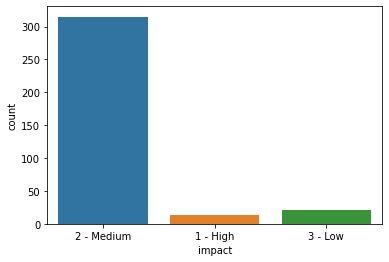

In [15]:
import seaborn as sns
sns.countplot(inc['impact'])

<AxesSubplot:xlabel='ID_status', ylabel='count'>

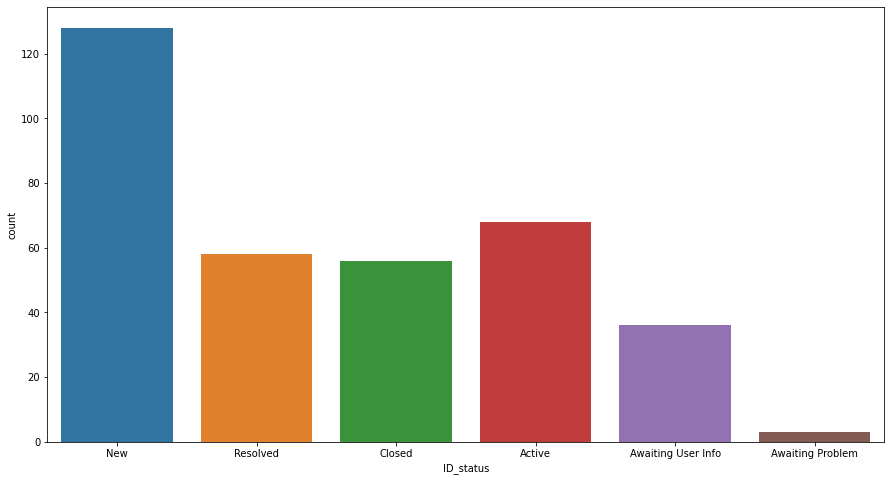

In [16]:
# Visulaization for categorical attributes
plt.figure(figsize=(15,8))

sns.countplot(inc['ID_status'])

<AxesSubplot:xlabel='active', ylabel='count'>

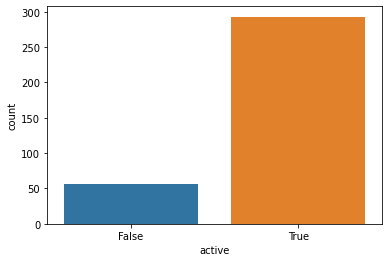

In [17]:
sns.countplot(inc['active'])

<AxesSubplot:xlabel='Doc_knowledge', ylabel='count'>

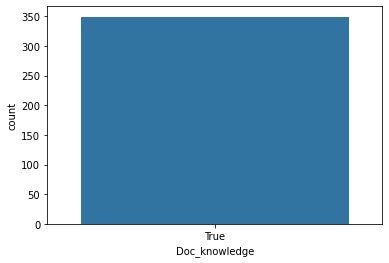

In [18]:
sns.countplot(inc['Doc_knowledge'])

<AxesSubplot:xlabel='confirmation_check', ylabel='count'>

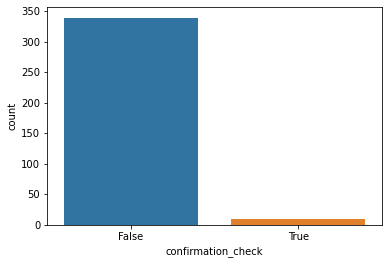

In [19]:
sns.countplot(inc['confirmation_check'])

<AxesSubplot:xlabel='notify', ylabel='count'>

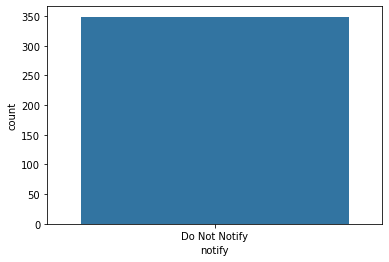

In [20]:
sns.countplot(inc['notify'])

<AxesSubplot:xlabel='type_contact', ylabel='count'>

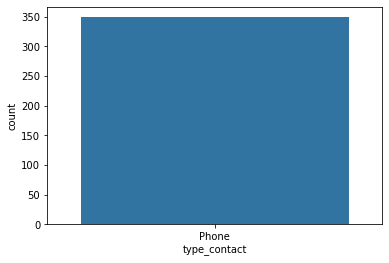

In [21]:
sns.countplot(inc['type_contact'])

<AxesSubplot:xlabel='location', ylabel='count'>

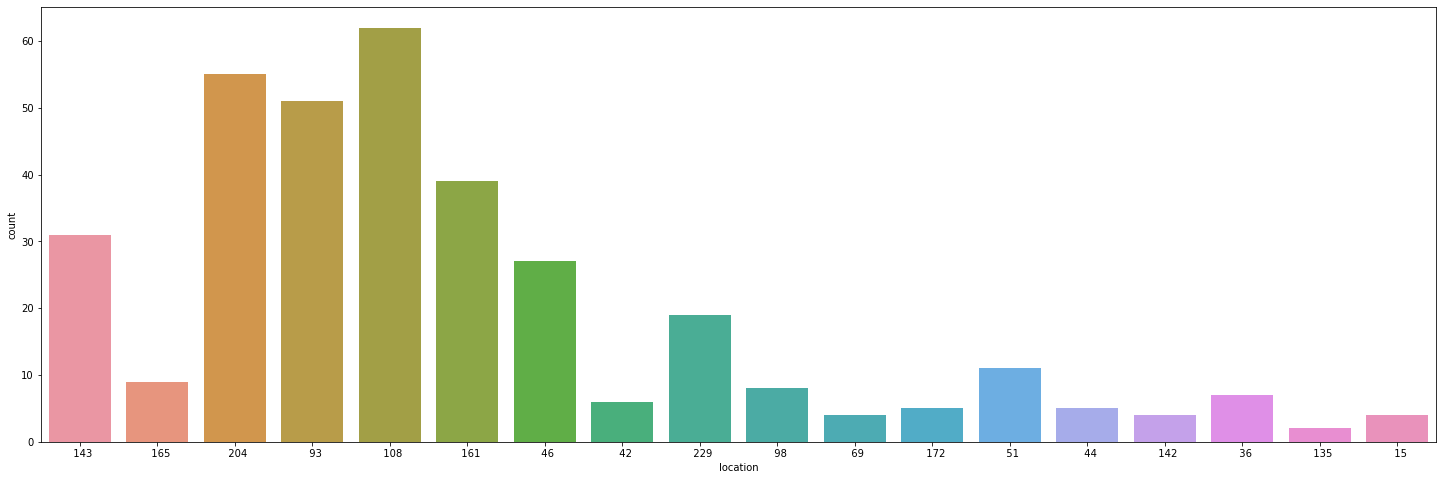

In [22]:
plt.figure(figsize=(25,8))
sns.countplot(inc['location'])

In [23]:
# Visulaization for numerical attributes

In [24]:
def dist(inc,var1):
    plt.figure()
    sns.distplot(inc[var1],kde = False,bins = 30)
    plt.show()

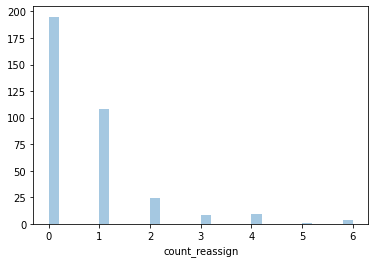

In [25]:
dist(inc,"count_reassign")

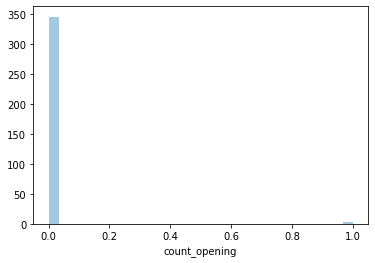

0    346
1      3
Name: count_opening, dtype: int64
0.9914040114613181


In [26]:
dist(inc, "count_opening")
open_val_count = inc['count_opening'].value_counts()
print(open_val_count)
print(open_val_count[0]/len(inc))

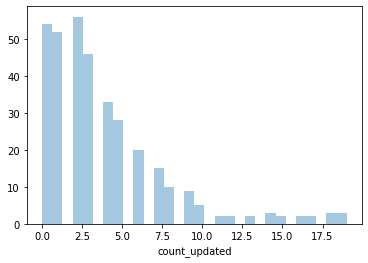

2     56
0     54
1     52
3     46
4     33
5     28
6     20
7     15
8     10
9      9
10     5
18     3
14     3
19     3
11     2
12     2
13     2
15     2
16     2
17     2
Name: count_updated, dtype: int64
Most updated count : 19
0.9255014326647565


In [27]:
dist(inc, "count_updated")
updated_val_count = inc['count_updated'].value_counts()
print(updated_val_count[0:20])
print("Most updated count :", updated_val_count.index.max())
print(updated_val_count[0:10].sum()/len(inc))

# check for the missing values

<AxesSubplot:>

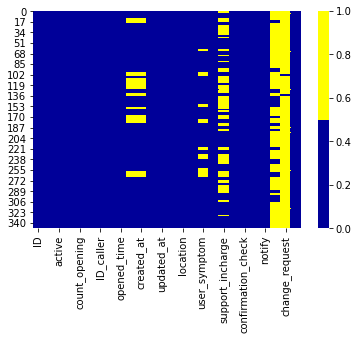

In [29]:
cols =inc.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(inc[cols].isnull(),
            cmap=sns.color_palette(colours))

In [30]:
# Value Counts
inc['active'].value_counts()

True     293
False     56
Name: active, dtype: int64

In [31]:
inc['count_reassign'].value_counts()

0    195
1    108
2     24
4      9
3      8
6      4
5      1
Name: count_reassign, dtype: int64

In [32]:
inc['count_reassign'].value_counts()

0    195
1    108
2     24
4      9
3      8
6      4
5      1
Name: count_reassign, dtype: int64

In [33]:
inc['count_opening'].value_counts()

0    346
1      3
Name: count_opening, dtype: int64

In [34]:
inc['count_updated'].value_counts()

2     56
0     54
1     52
3     46
4     33
5     28
6     20
7     15
8     10
9      9
10     5
18     3
14     3
19     3
11     2
12     2
13     2
15     2
16     2
17     2
Name: count_updated, dtype: int64

In [35]:
inc['Doc_knowledge'].value_counts()

True    349
Name: Doc_knowledge, dtype: int64

In [36]:
inc['confirmation_check'].value_counts()

False    339
True      10
Name: confirmation_check, dtype: int64

In [37]:
inc['notify'].value_counts()

Do Not Notify    349
Name: notify, dtype: int64

In [38]:
#format the date & columns
inc["updated_day"]=pd.to_datetime(inc.updated_at).dt.day
inc["updated_month"]=pd.to_datetime(inc.updated_at).dt.month
inc["updated_year"]=pd.to_datetime(inc.updated_at).dt.year
inc["updated_hr"]=pd.to_datetime(inc.updated_at).dt.hour
inc["updated_minute"]=pd.to_datetime(inc.updated_at).dt.minute
inc["opened_at_day"]=pd.to_datetime(inc.opened_time).dt.day
inc["opened_at_month"]=pd.to_datetime(inc.opened_time).dt.month
inc["opened_at_year"]=pd.to_datetime(inc.opened_time).dt.year
inc["opened_at_hr"]=pd.to_datetime(inc.opened_time).dt.hour
inc["opened_at_minute"]=pd.to_datetime(inc.opened_time).dt.minute
inc["created_at_day"]=pd.to_datetime(inc.created_at).dt.day
inc["created_at_month"]=pd.to_datetime(inc.created_at).dt.month
inc["created_at_year"]=pd.to_datetime(inc.created_at).dt.year
inc["created_at_hr"]=pd.to_datetime(inc.created_at).dt.hour
inc["created_at_minute"]=pd.to_datetime(inc.created_at).dt.minute

In [39]:
for col_name in inc.columns: 
    print ("column:",col_name,".Missing:",sum(inc[col_name].isnull()))

column: ID .Missing: 0
column: ID_status .Missing: 0
column: active .Missing: 0
column: count_reassign .Missing: 0
column: count_opening .Missing: 0
column: count_updated .Missing: 0
column: ID_caller .Missing: 0
column: opened_by .Missing: 0
column: opened_time .Missing: 0
column: Created_by .Missing: 62
column: created_at .Missing: 62
column: updated_by .Missing: 0
column: updated_at .Missing: 0
column: type_contact .Missing: 0
column: location .Missing: 0
column: Category_id .Missing: 0
column: user_symptom .Missing: 45
column: Support_group .Missing: 0
column: support_incharge .Missing: 155
column: Doc_knowledge .Missing: 0
column: confirmation_check .Missing: 0
column: impact .Missing: 0
column: notify .Missing: 0
column: problem_ID .Missing: 267
column: change_request .Missing: 343
column: target_impact .Missing: 0
column: updated_day .Missing: 0
column: updated_month .Missing: 0
column: updated_year .Missing: 0
column: updated_hr .Missing: 0
column: updated_minute .Missing: 0
co

In [40]:
inc2=inc.copy()

In [41]:
#Drop the columns which are not required as opened_time,created_at,updated_at we have split it datetime format we dont need these columns and problem_id,change_request_support_incharge have more than 50% missing hence we will remove this column too
inc2.drop(['opened_time','created_at','updated_at','support_incharge','change_request','problem_ID'],axis=1,inplace=True)

### Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
inc2['ID_status']=number.fit_transform(inc2['ID_status'])
inc2['ID_status'].value_counts()

4    128
0     68
5     58
3     56
2     36
1      3
Name: ID_status, dtype: int64

In [43]:
inc2['active']=number.fit_transform(inc2['active'])
inc2['active'].value_counts()

1    293
0     56
Name: active, dtype: int64

In [44]:
inc2['type_contact']=number.fit_transform(inc2['type_contact'])
inc2['type_contact'].value_counts()

0    349
Name: type_contact, dtype: int64

In [51]:
inc2['Doc_knowledge']=number.fit_transform(inc['Doc_knowledge'])
inc2['Doc_knowledge'].value_counts()

0    349
Name: Doc_knowledge, dtype: int64

In [52]:
inc2['confirmation_check']=number.fit_transform(inc['confirmation_check'])
inc2['confirmation_check'].value_counts()

0    339
1     10
Name: confirmation_check, dtype: int64

In [53]:
#Filling na values with the median values
for columns in ['user_symptom','created_at_day','created_at_month','created_at_year','created_at_hr','created_at_minute']:
    median=inc2[columns].median()
    inc2[columns]=inc2[columns].fillna(median)

In [54]:
inc2.drop(['impact'],axis=1,inplace=True)

In [55]:
inc2.drop(['notify'],axis=1,inplace=True)

In [56]:
inc2['ID']=inc2['ID'].str.replace("INC", " ") 
inc2.head(2)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,...,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute
0,0000045,4,1,0,0,0,2403,8,6,21,...,29,2,2016,1,16,29.0,2.0,2016.0,1.0,23.0
1,0000045,5,1,0,0,2,2403,8,6,642,...,29,2,2016,1,16,29.0,2.0,2016.0,1.0,23.0


In [57]:
inc2['Created_by'] = inc2['Created_by'].astype(float)
inc2['Created_by'].fillna((inc2['Created_by'].mean()), inplace=True)
inc2['Created_by'] = inc2['Created_by'].astype(int)

In [58]:
inc2['ID']=inc2['ID'].astype(int)
inc2['location']=inc2['location'].astype(int)
inc2['ID']=inc2['ID'].astype(float).astype(int)
inc2['ID_caller']=inc2['ID_caller'].astype(int)
inc2['opened_by']=inc2['opened_by'].astype(int)
inc2['updated_by']=inc2['updated_by'].astype(int)
inc2['location']=inc2['location'].astype(int)
inc2['Category_id']=inc2['Category_id'].astype(int)
inc2['user_symptom']=inc2['user_symptom'].astype(int)
inc2['Support_group']=inc2['Support_group'].astype(int)

In [61]:
print(inc2.columns)

Index(['ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'ID_caller', 'opened_by', 'Created_by', 'updated_by',
       'type_contact', 'location', 'Category_id', 'user_symptom',
       'Support_group', 'Doc_knowledge', 'confirmation_check', 'target_impact',
       'updated_day', 'updated_month', 'updated_year', 'updated_hr',
       'updated_minute', 'opened_at_day', 'opened_at_month', 'opened_at_year',
       'opened_at_hr', 'opened_at_minute', 'created_at_day',
       'created_at_month', 'created_at_year', 'created_at_hr',
       'created_at_minute'],
      dtype='object')


In [62]:
incident1=inc2.copy()

In [63]:
inc2.to_csv('train_test_pred.csv')

In [64]:
inc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  349 non-null    int32  
 1   ID_status           349 non-null    int32  
 2   active              349 non-null    int64  
 3   count_reassign      349 non-null    int64  
 4   count_opening       349 non-null    int64  
 5   count_updated       349 non-null    int64  
 6   ID_caller           349 non-null    int32  
 7   opened_by           349 non-null    int32  
 8   Created_by          349 non-null    int32  
 9   updated_by          349 non-null    int32  
 10  type_contact        349 non-null    int32  
 11  location            349 non-null    int32  
 12  Category_id         349 non-null    int32  
 13  user_symptom        349 non-null    int32  
 14  Support_group       349 non-null    int32  
 15  Doc_knowledge       349 non-null    int64  
 16  confirma

### Spliting the dataset

In [65]:
X=incident1.drop("target_impact",axis=1)
y=incident1["target_impact"]

In [66]:
X.head(2)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,...,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute
0,45,4,1,0,0,0,2403,8,6,21,...,29,2,2016,1,16,29.0,2.0,2016.0,1.0,23.0
1,45,5,1,0,0,2,2403,8,6,642,...,29,2,2016,1,16,29.0,2.0,2016.0,1.0,23.0


In [67]:
y.head(2)

0    2
1    2
Name: target_impact, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=10)

### Using SMOTE
###### To handle im-balanced dataset

In [69]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [70]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [71]:
from collections import Counter
print("Before SMOTE :",Counter(y_train))
print("After SMOTE :",Counter(y_train_smote))

Before SMOTE : Counter({2: 221, 3: 16, 1: 7})
After SMOTE : Counter({2: 221, 1: 221, 3: 221})


### Feature Selection

#### 1. Chi-square Test

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [73]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=30)
ordered_feature=ordered_rank_feature.fit(X_train_smote,y_train_smote)
ordered_feature

SelectKBest(k=30, score_func=<function chi2 at 0x00000201DFC5C3A0>)

In [75]:
df_scores=pd.DataFrame(ordered_feature.scores_,columns=['scores'])
df_columns=pd.DataFrame(X_train.columns)
features_rank=pd.concat([df_scores,df_columns],axis=1)
features_rank.nlargest(30,'scores')

,scores,0
6,117492.431730,ID_caller
7,34801.845504,opened_by
13,13761.264322,user_symptom
11,10861.149118,location
9,7479.330258,updated_by
14,1927.228512,Support_group
12,1839.490306,Category_id
26,1257.556374,opened_at_minute
8,565.977750,Created_by
31,397.068645,created_at_minute


#### 2. ExtraTreesClassifier

In [76]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [77]:
model=ExtraTreesClassifier()
model.fit(X_train_smote,y_train_smote)

ExtraTreesClassifier()

In [78]:
print(model.feature_importances_)

[3.69995805e-02 2.16434504e-02 1.40086132e-02 1.85951964e-02
 5.87760817e-05 1.90921066e-02 6.02719701e-02 1.46598603e-01
 7.59494475e-02 1.76488124e-02 0.00000000e+00 1.16577790e-01
 5.91059210e-02 9.91851991e-02 6.86690675e-02 0.00000000e+00
 1.32445485e-03 1.14988281e-02 2.18229420e-02 0.00000000e+00
 1.98587335e-02 9.22767379e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.94215229e-02 6.87587924e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.35147187e-02 5.01678006e-02]


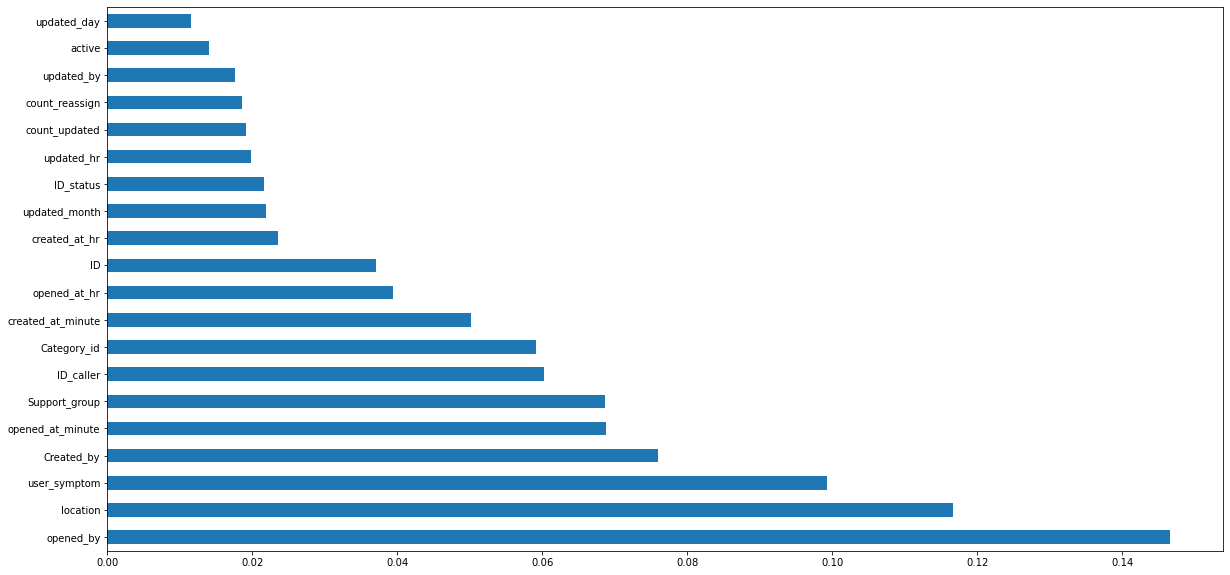

In [79]:
plt.figure(figsize=(20,10))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

#### 3. Mutual Information Classifier

In [80]:
from sklearn.feature_selection import mutual_info_classif

In [81]:
mutual_info=mutual_info_classif(X_train_smote,y_train_smote)

In [82]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Category_id           0.867845
user_symptom          0.829105
ID_caller             0.826788
created_at_minute     0.742220
location              0.722806
ID                    0.706367
opened_by             0.671890
opened_at_minute      0.592932
Created_by            0.589273
Support_group         0.550720
updated_by            0.360501
opened_at_hr          0.341871
created_at_hr         0.253064
count_updated         0.243817
updated_hr            0.228975
count_reassign        0.180918
updated_day           0.164526
updated_minute        0.144728
ID_status             0.123628
updated_month         0.087482
active                0.081139
confirmation_check    0.053496
created_at_day        0.015737
created_at_year       0.013025
type_contact          0.009487
updated_year          0.002824
opened_at_year        0.001345
created_at_month      0.000000
count_opening         0.000000
opened_at_day         0.000000
opened_at_month       0.000000
Doc_knowledge         0.000000
dtype: f

<AxesSubplot:>

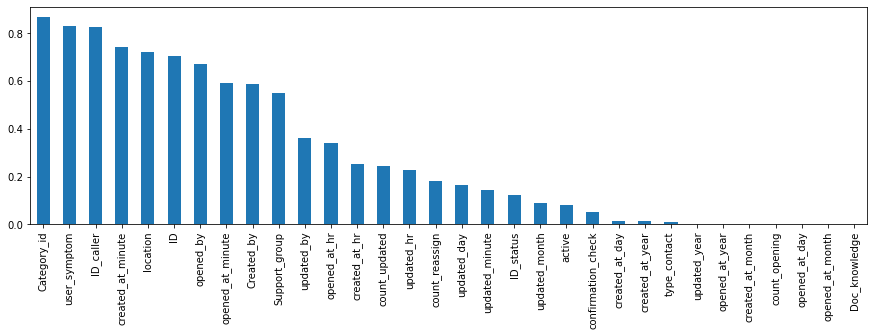

In [83]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 4))

In [84]:
#Now we Will select the  top 10 important features
sel_top_cols = SelectKBest(mutual_info_classif, k=10)
sel_top_cols.fit(X_train_smote, y_train_smote)
X_train.columns[sel_top_cols.get_support()]

Index(['ID', 'ID_caller', 'opened_by', 'Created_by', 'location', 'Category_id',
       'user_symptom', 'Support_group', 'opened_at_minute',
       'created_at_minute'],
      dtype='object')

#### 4. Decision Tree Classifier 

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
model= DecisionTreeClassifier()
model.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [87]:
feature = pd.Series(model.feature_importances_)
feature.index = X_train.columns
feature.sort_values(ascending=False)

opened_by             0.379793
location              0.279815
ID_caller             0.156511
Category_id           0.105652
ID                    0.041795
created_at_minute     0.036435
opened_at_hr          0.000000
opened_at_year        0.000000
ID_status             0.000000
active                0.000000
count_reassign        0.000000
count_opening         0.000000
count_updated         0.000000
created_at_year       0.000000
created_at_month      0.000000
Created_by            0.000000
updated_by            0.000000
type_contact          0.000000
created_at_day        0.000000
opened_at_minute      0.000000
user_symptom          0.000000
Support_group         0.000000
created_at_hr         0.000000
confirmation_check    0.000000
updated_day           0.000000
updated_month         0.000000
updated_year          0.000000
updated_hr            0.000000
updated_minute        0.000000
opened_at_day         0.000000
opened_at_month       0.000000
Doc_knowledge         0.000000
dtype: f

<AxesSubplot:>

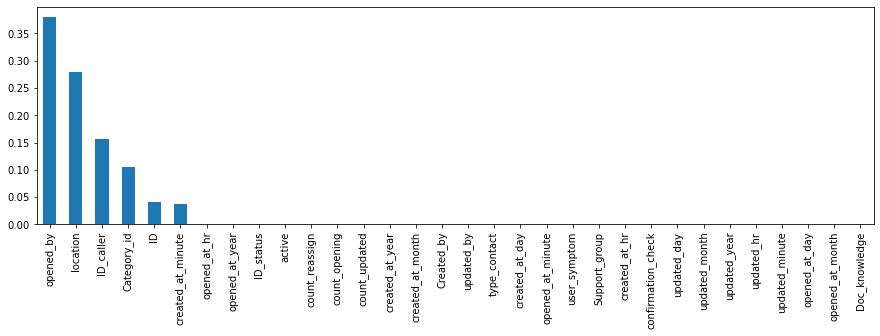

In [88]:
feature.sort_values(ascending=False).plot.bar(figsize=(15, 4))

In [89]:
X_train_new= X_train_smote[['opened_by','location','ID_caller','Category_id','ID']]
X_test_new= X_test[['opened_by','location','ID_caller','Category_id','ID']]

### 1. Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=27)
model_rf.fit(X_train_new,y_train_smote)

RandomForestClassifier(max_depth=27)

In [91]:
# Predicting the model
Y_predict_rf = model_rf.predict(X_test_new)

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [93]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import classification_report
print(accuracy_score(y_test,Y_predict_rf))
print(classification_report(y_test,Y_predict_rf))

0.9809523809523809
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           2       1.00      0.98      0.99        94
           3       1.00      1.00      1.00         5

    accuracy                           0.98       105
   macro avg       0.92      0.99      0.95       105
weighted avg       0.99      0.98      0.98       105



In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Y_predict_rf)

array([[ 6,  0,  0],
       [ 2, 92,  0],
       [ 0,  0,  5]], dtype=int64)

In [95]:
print("Train Accuracy:",model_rf.score(X_train_new, y_train_smote)*100)
print("Test Accuracy:",model_rf.score(X_test_new, y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 98.09523809523809


### 2. Neural Network

In [96]:
from sklearn.neural_network import MLPClassifier

In [97]:
model_mlp = MLPClassifier()
model_mlp.fit(X_train_new,y_train_smote)

MLPClassifier()

In [98]:
# Predicting the model
Y_predict_mlp = model_mlp.predict(X_test_new)

In [99]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,Y_predict_mlp))
print(classification_report(y_test,Y_predict_mlp))

0.8285714285714286
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         6
           2       0.97      0.83      0.90        94
           3       0.43      0.60      0.50         5

    accuracy                           0.83       105
   macro avg       0.58      0.81      0.63       105
weighted avg       0.91      0.83      0.86       105



In [100]:
print("Train Accuracy:",model_mlp.score(X_train_new, y_train_smote)*100)
print("Test Accuracy:",model_mlp.score(X_test_new, y_test)*100)

Train Accuracy: 76.01809954751131
Test Accuracy: 82.85714285714286


### 3. Support Vector Classifier

In [101]:
from sklearn.svm import SVC
# Training the model
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(X_train_new,y_train_smote)
# Predicting the model
Y_predict_svm = rbf_svc.predict(X_test_new)

In [102]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,Y_predict_svm))


0.9333333333333333


In [103]:
print(classification_report(y_test,Y_predict_svm))

              precision    recall  f1-score   support

           1       0.46      1.00      0.63         6
           2       1.00      0.93      0.96        94
           3       1.00      1.00      1.00         5

    accuracy                           0.93       105
   macro avg       0.82      0.98      0.86       105
weighted avg       0.97      0.93      0.94       105



In [104]:
print("Train Accuracy:",rbf_svc.score(X_train_new, y_train_smote)*100)
print("Test Accuracy:",rbf_svc.score(X_test_new, y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 93.33333333333333


### 4. KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_new,y_train_smote)

KNeighborsClassifier()

In [106]:
pred = knn.predict(X_test_new)

In [107]:
print(confusion_matrix(y_test,pred))

[[ 6  0  0]
 [ 4 90  0]
 [ 0  0  5]]


In [108]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75         6
           2       1.00      0.96      0.98        94
           3       1.00      1.00      1.00         5

    accuracy                           0.96       105
   macro avg       0.87      0.99      0.91       105
weighted avg       0.98      0.96      0.97       105



In [109]:
print("Train Accuracy:",knn.score(X_train_new, y_train_smote)*100)
print("Test Accuracy:",knn.score(X_test_new, y_test)*100)

Train Accuracy: 98.34087481146304
Test Accuracy: 96.19047619047619


### 5. Decision Tree Classifier

In [110]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [111]:
#Building Decision Tree Classifier using Entropy Criteria
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train_new,y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

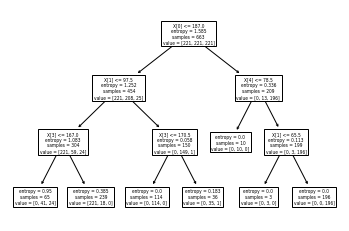

In [112]:
#PLot the decision tree
tree.plot_tree(model);

In [113]:
#Predicting on test data
preds = model.predict(X_test_new) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    85
1    17
3     3
dtype: int64

In [114]:
# Accuracy 
np.mean(preds==y_test)

0.8761904761904762

In [115]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [116]:
model_gini.fit(X_train_new, y_train_smote)

DecisionTreeClassifier(max_depth=3)

In [117]:
#Prediction and computing the accuracy
pred=model.predict(X_test_new)
np.mean(preds==y_test)

0.8761904761904762

In [118]:
print("Train Accuracy:",model_gini.score(X_train_new, y_train_smote)*100)
print("Test Accuracy:",model_gini.score(X_test_new, y_test)*100)

Train Accuracy: 94.7209653092006
Test Accuracy: 91.42857142857143


### 6. Gausian NB

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_new, y_train_smote)

#Predict the response for test dataset
y_pred = gnb.predict(X_test_new)

In [121]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8857142857142857


In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.55      1.00      0.71         6
           2       0.98      0.89      0.93        94
           3       0.38      0.60      0.46         5

    accuracy                           0.89       105
   macro avg       0.63      0.83      0.70       105
weighted avg       0.92      0.89      0.90       105



In [123]:
print("Train Accuracy:",gnb.score(X_train_new, y_train_smote)*100)
print("Test Accuracy:",gnb.score(X_test_new, y_test)*100)

Train Accuracy: 93.81598793363499
Test Accuracy: 88.57142857142857


### Voting Classifier

In [124]:
from sklearn.ensemble import VotingClassifier
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=101)

In [125]:
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('GaussianNB', nb),
('K Nearest Neighbours', knn),
('Classification Tree', dt)]

In [126]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
  clf.fit(X_train_new, y_train_smote)
  y_pred = clf.predict(X_test_new)
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

GaussianNB : 0.886
K Nearest Neighbours : 0.962
Classification Tree : 0.981


In [127]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train_new, y_train_smote)
y_pred = vc.predict(X_test_new)
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier: 0.981


In [128]:
print("Train Accuracy:",vc.score(X_train_new, y_train_smote)*100)
print("Test Accuracy:",vc.score(X_test_new, y_test)*100)

Train Accuracy: 99.24585218702866
Test Accuracy: 98.09523809523809


### Bagging Classifier

In [129]:
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(random_state=101)
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
bc.fit(X_train_new, y_train_smote)
y_pred = bc.predict(X_test_new)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.981


In [130]:
print("Train Accuracy:",bc.score(X_train_new, y_train_smote)*100)
print("Test Accuracy:",bc.score(X_test_new, y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 98.09523809523809


### AdaBoost Classifier

In [131]:
from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier(random_state=101)
abc = AdaBoostClassifier(base_estimator=dt, n_estimators=300)
abc.fit(X_train_new, y_train_smote)
y_pred = bc.predict(X_test_new)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.981


In [132]:
print("Train Accuracy:",abc.score(X_train_new, y_train_smote)*100)
print("Test Accuracy:",abc.score(X_test_new, y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 98.09523809523809


### XgBoost Classifier

In [136]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_new, y_train_smote)
y_pred = xgb.predict(X_test_new)
accuracy = accuracy_score(y_test, y_pred)

[22:30:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [137]:
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.981


In [138]:
print("Train Accuracy:",xgb.score(X_train_new, y_train_smote)*100)
print("Test Accuracy:",xgb.score(X_test_new, y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 98.09523809523809


### Hyperparameter Tuning

### Grid Search CV 

In [139]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
gbm_param_grid = {'learning_rate': [0.05],'n_estimators': [50, 100, 150],'max_depth': [6, 7, 8]}
gbm = xgb.XGBClassifier()
grid_cv = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, cv=4, verbose=1, n_jobs=-1)
grid_cv.fit(X_train_new, y_train_smote)
print("Best parameters found: ",grid_cv.best_params_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[22:30:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 50}


In [140]:
print("Best Score found: ", np.sqrt(np.abs(grid_cv.best_score_)))

Best Score found:  0.99849284013819


### Randomised Forest

In [141]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
gbm_param_grid = {'learning_rate': np.arange(0.05,1.05,.05),'n_estimators': [100, 200, 300],'max_depth': range(1,10)}
gbm = xgb.XGBClassifier()
randomized_cv = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid, n_iter=25,random_state=101, cv=4, verbose=1, n_jobs=-1)
randomized_cv.fit(X_train_new, y_train_smote)
print("Best parameters found: ",randomized_cv.best_params_)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
[22:57:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters found:  {'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.7000000000000001}


In [142]:
print("Best Score found: ", np.sqrt(np.abs(randomized_cv.best_score_)))

Best Score found:  0.9992467042245445
